<a href="https://colab.research.google.com/github/Artenida/computer-vision-exercises/blob/main/Exercise1_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load the built-in image 'coffee' of the skimage libraries

<ipython-input-4-98ecc4fa85a6>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)
<ipython-input-4-98ecc4fa85a6>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


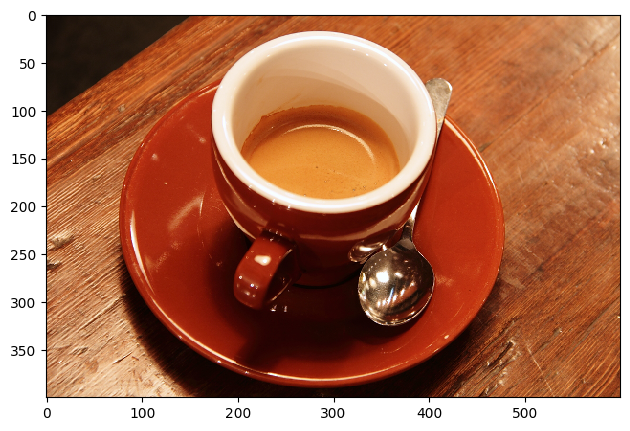

N = 400 rows, M = 600 columns, NC = 3 color channels


In [4]:
from skimage import data, io

I = data.coffee()
io.imshow(I)
io.show()
rows, cols, channels = I.shape
print(f'N = {rows} rows, M = {cols} columns, NC = {channels} color channels')

Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions.

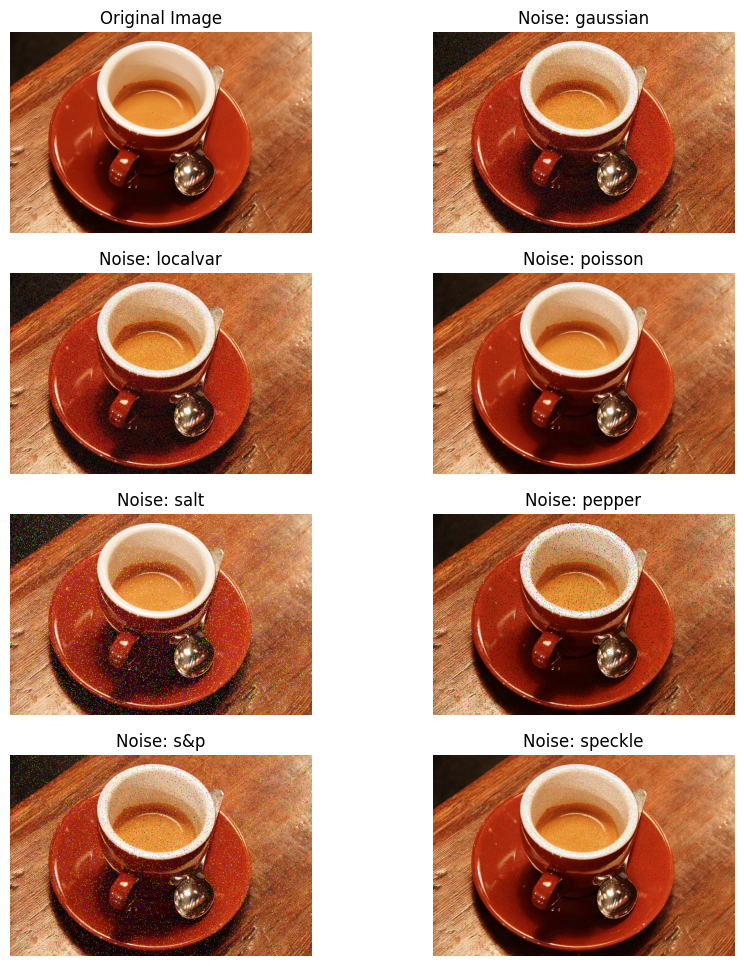

In [13]:
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage import img_as_float

IC = img_as_float(I) # Convert the image to floating-point format as required by random_noise

# Define noise types
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

# Create noisy versions
noisy_images = [random_noise(I, mode=mode) for mode in noise_types]

fig, axes = plt.subplots(4,2, figsize=(10,12))
axes = axes.ravel()

axes[0].imshow(I)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i in range(7):
  axes[i + 1].imshow(noisy_images[i])
  axes[i + 1].set_title(f'Noise: {noise_types[i]}')
  axes[i + 1].axis('off')

plt.show()

Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

I'm applying Gaussian Noise with Different Intensities
Example of Variances:
sigma1 = 0.02
sigma2 = 0.15
sigma3 = 0.2

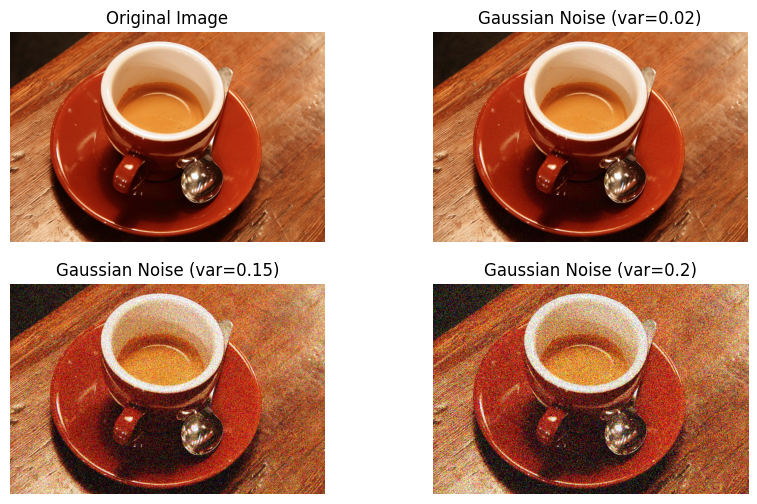

In [23]:
img = IC

# Generate Gaussian noisy images with different variances/intensity levels
noisy_low = random_noise(img, mode = 'gaussian', var = 0.02**2)
noisy_medium = random_noise(img, mode = 'gaussian', var=0.15**2)
noisy_high = random_noise(img, mode='gaussian', var=0.2**2)

fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes = axes.ravel()

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(noisy_low)
axes[1].set_title('Gaussian Noise (var=0.02)')
axes[2].imshow(noisy_medium)
axes[2].set_title('Gaussian Noise (var=0.15)')
axes[3].imshow(noisy_high)
axes[3].set_title('Gaussian Noise (var=0.2)')

for ax in axes:
  ax.axis('off')

plt.show()

 Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter. Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

 We need to apply Gaussian filter to three noisy images, and vary the sigma value to observe the effects.
 sigma controls the amount of smoothing:
 1. Low sigma -> less smoothing (keeps edges, noise may remain)
 2. High sigma -> more smoothing (can remove more noise, but also blur edges and details)

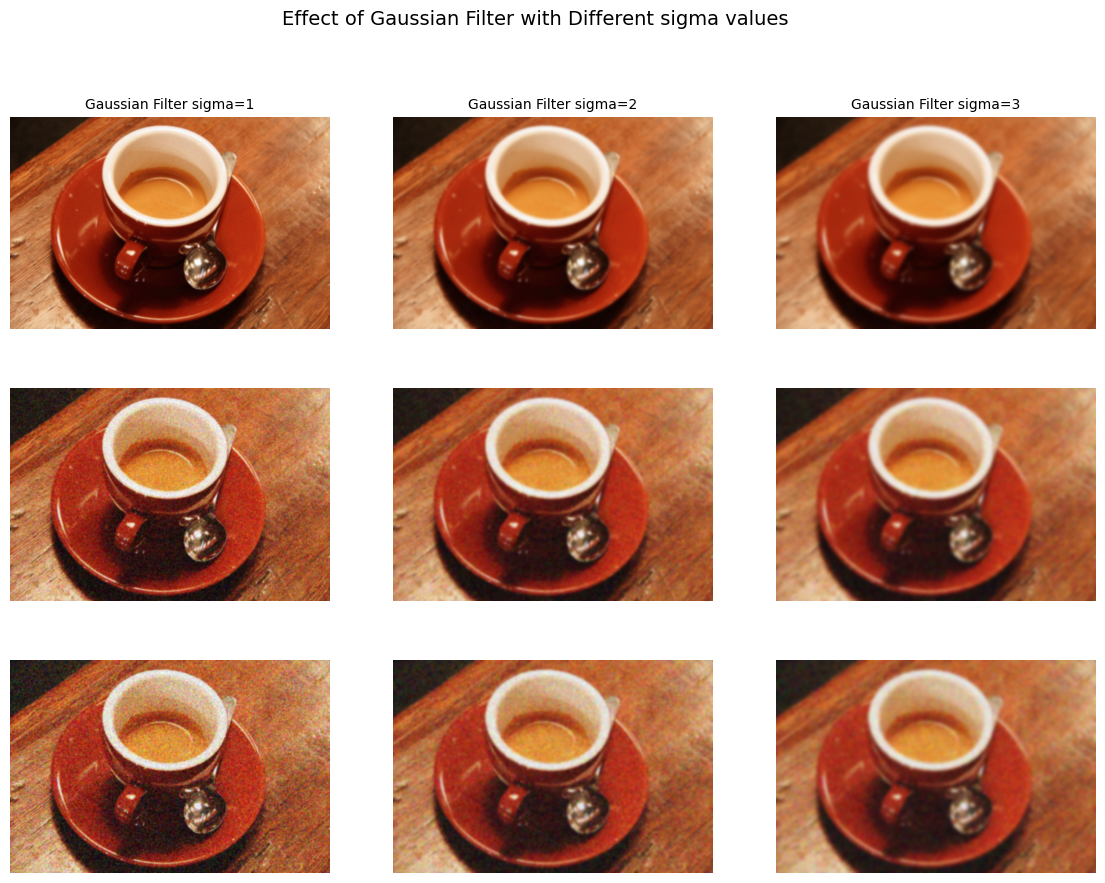

In [30]:
from skimage.filters import gaussian

# Create list of noisy images
noisy_images = [noisy_low, noisy_medium, noisy_high]
noise_titles = ['Noise sigma = 0.02', 'Noise sigma = 0.15', 'Noise sigma = 0.2']

# Apply Gaussian filter with different sigma values
filter_sigmas = [1, 2, 3]

# Plot results
fig, axes = plt.subplots(3, 3, figsize=(14,10))

for i, noisy_img in enumerate(noisy_images):
  for j, sigma in enumerate(filter_sigmas):
    filtered = gaussian(noisy_img, sigma = sigma, channel_axis = -1, preserve_range = True)
    axes[i, j].imshow(filtered)
    axes[i, j].axis('off')
    if i == 0:
      axes[i, j].set_title(f'Gaussian Filter sigma={sigma}', fontsize=10)
    if j==0:
      axes[i,j].set_ylabel(noise_titles[i], fontsize=10)

plt.suptitle('Effect of Gaussian Filter with Different sigma values', fontsize=14)
plt.show()

(This comment is for task 4)
First row: Even low sigma, (sigma = 1) already smooths minor noise
Higher sigma, (sigma = 3), leads to slight blurring but still keeps structure
Second row: At sigma = 1, remains some noise, at sigma 2 and 3, more noise is removed but edges and colors blur.
Third row: Heaviest noise, so sigma = 1 isn't enough.
At sigma=3, noise is mostly removed, but image is heavily blurred.

- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

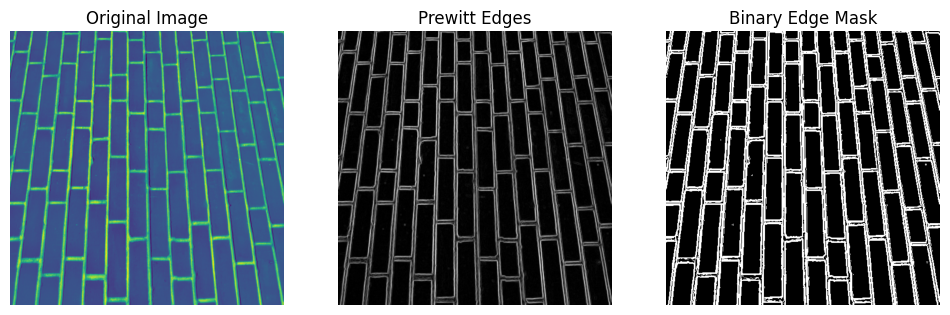

Fraction of image that is edge: 0.2517
Franction of image that is bricks: 0.7483


In [34]:
import matplotlib.pyplot as plt
from skimage import data, color, filters
import numpy as np

img = data.brick()

# Apply Prewitt filter
edges = filters.prewitt(img)

# Threshold the edge image to create a binary edge mask
threshold = 0.05
edge_mask = edges > threshold

total_pixels = img.size
edge_pixels = np.sum(edge_mask)
fraction_edges = edge_pixels / total_pixels
fraction_bricks = 1 - fraction_edges

fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Prewitt Edges')
axes[2].imshow(edge_mask, cmap='gray')
axes[2].set_title('Binary Edge Mask')

for ax in axes:
  ax.axis('off')

plt.show()

print(f'Fraction of image that is edge: {fraction_edges:.4f}')
print(f'Franction of image that is bricks: {fraction_bricks:.4f}')